# Differential Evolution Algorithm
1. create initial population
2. calculate fitness function for each individual in the population
3. calculate average fitness of the whole population
4. evolve function
    1. sort depending on fitness
    2. mutate some individuals
    3. crossover some individual





# Import all Needed Liberaries

In [6]:
import numpy as np
import random

## Create Board Functions

In [7]:

"""
begin phase to create a ready board

@author: Abdelrahman

"""

# creating empty board
def createEmptyBoard():
    """
    to create empty board to fill it later with another function

    :return: empty 2D numpy array
    """

    board = np.array([
        np.zeros(9, dtype=int) for _ in range(9)
    ])
    return board


# create initial board
def createBoard(cellsNumberToBeFilled=17):
    """

    :param cellsNumberToBeFilled: number of cells to be filled with random numbers as a start -- default 17
    :return: 2D numpy array with random values
    """

    board = createEmptyBoard()

    while cellsNumberToBeFilled > 0:
        randomNumber = random.randint(1, 9)
        randomRowIndex = random.randint(0, 8)
        randomColumnIndex = random.randint(0, 8)

        if isAvailableToAddNumberInBoard(board, randomNumber,
                                         randomRowIndex, randomColumnIndex):
            board[randomRowIndex][randomColumnIndex] = randomNumber
            cellsNumberToBeFilled -= 1

    return board


# board check
def isAvailableToAddNumberInBoard(board, number, rowIndex, columnIndex):
    """

    :param board: board to check availability on
    :param number: number you would add
    :param rowIndex: row index to add the number in
    :param columnIndex: column index to add the number in
    :return: True if possible otherwise False
    """
    # check rows
    availableRow = isAvailableToAddNumberInRow(board, number, rowIndex)

    # check columns
    availableColumn = isAvailableToAddNumberInColumn(board, number, columnIndex)

    # check blocks
    availableBlock = isAvailableToAddNumberInBlock(board, number, rowIndex, columnIndex)

    if availableRow and availableColumn and availableBlock:
        return True

    return False


# row check
def isAvailableToAddNumberInRow(board, number, rowIndex):
    """

    :param board: board to check the availability on
    :param number: number you would add
    :param rowIndex: row index to add the number in
    :return: boolean -> True if possible otherwise False
    """
    if number not in board[rowIndex]:
        return True

    return False


# column check
def isAvailableToAddNumberInColumn(board, number, columnIndex):
    """

    checks if it is right to add number in given column or not

    :param board: the board that you want to check availability on
    :param number: number you would add
    :param columnIndex: column index to add the number in
    :return: boolean -> True if available to add the number otherwise False
    """
    if number not in board.T[columnIndex]:
        return True

    return False


# block check
def isAvailableToAddNumberInBlock(board, number, rowIndex, columnIndex):
    """

    :param board: board to check the availability in
    :param number: number you would add
    :param rowIndex: row index to add the number in
    :param columnIndex: column index to add the number in
    :return: boolean -> True it is possible to add the number otherwise False
    """

    row0 = rowIndex - (rowIndex % 3)
    column0 = columnIndex - (columnIndex % 3)

    for r in range(3):
        for c in range(3):
            if board[row0 + r][column0 + c] == number:
                return False

    return True


# get saved positions in initial board
def getSavedPositions(board):
    """

    :param board: must be the initial board
    :return: set of saved positions which means all another
    """
    savedPositions = set()

    for row in range(9):
        for col in range(9):
            if board[row][col] != 0:
                savedPositions.add((row, col))

    return savedPositions


# printing the board
def printBoard(board, emptySymbol="*"):
    """
    :param board: 2d numpy array to represent the sudoku board
    :param emptySymbol: what to put in empty cells instead of zero -- default *
    """
    print(str(board).replace("0", emptySymbol))


# printing board better
def printRealBoard(board):
    print("\n-------------------------")

    for i in range(9):
        for j in range(9):
            if board[i][j] is not None:
                if j == 0:
                    print("|", end=" ")
                print(f"{board[i][j]} ", end="")
            if (j + 1) % 3 == 0:
                print("|", end=" ")
        if (i + 1) % 3 == 0:
            print("\n-------------------------", end=" ")
        print()


# Test
board = createBoard()
printBoard(board)
printRealBoard(board)

# Testing get positions
savedPositions = getSavedPositions(board)
for x in range(9):
    for y in range(9):
        if (x, y) not in savedPositions:
            board[x][y] = random.randint(1, 9)
# print(np.random.randint(low=1, high=9, size=(9, 9)))


[[6 7 1 * * * * * *]
 [* * 3 * 4 * 7 * *]
 [* * * * * * * * *]
 [2 3 * * * * * * 5]
 [* * * * * 1 * * *]
 [* * * * * 2 * * *]
 [* * * * * * * * *]
 [1 * * 7 * * 8 * 9]
 [* 9 * 5 * * * * *]]

-------------------------
| 6 7 1 | 0 0 0 | 0 0 0 | 
| 0 0 3 | 0 4 0 | 7 0 0 | 
| 0 0 0 | 0 0 0 | 0 0 0 | 
------------------------- 
| 2 3 0 | 0 0 0 | 0 0 5 | 
| 0 0 0 | 0 0 1 | 0 0 0 | 
| 0 0 0 | 0 0 2 | 0 0 0 | 
------------------------- 
| 0 0 0 | 0 0 0 | 0 0 0 | 
| 1 0 0 | 7 0 0 | 8 0 9 | 
| 0 9 0 | 5 0 0 | 0 0 0 | 
------------------------- 


## Create Population Functions

In [8]:
"""
population creation phase

@author: Maya Ahmed

"""


def createPopulation(numberofpopulation=10):
    """

    :param numberofpopulation: length of the population returned by this function
    :return: population with given length defualt = 10 individuals
    """
    pop = np.zeros((numberofpopulation, 9, 9), dtype=np.int64)
    for z in range(numberofpopulation):
        for x in range(9):
            for y in range(9):
                if (x, y) not in savedPositions:
                    pop[z][x][y] = random.randint(1, 9)
                else:
                    pop[z][x][y] = grid[x][y]

    return pop


# For testing only
def createPopulationFromBoard(board, numberofpopulation=10):
    """

    :param board: board to take saved positions from
    :param numberofpopulation: length of population
    :return: population of given length based on given board
    """
    pop = np.zeros((numberofpopulation, 9, 9), dtype=np.int64)
    savedPositions = getSavedPositions(board)

    for z in range(numberofpopulation):
        for x in range(9):
            for y in range(9):
                if (x, y) not in savedPositions:
                    pop[z][x][y] = random.randint(1, 9)
                else:
                    pop[z][x][y] = board[x][y]

    return pop


print("nothing")
board = createBoard()
print(board)

pop = createPopulationFromBoard(board, 2)

print(pop)


nothing
[[0 0 2 0 0 0 0 0 0]
 [8 0 0 0 6 0 3 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 2 0 5 0 0]
 [6 0 0 0 0 0 0 8 0]
 [0 7 0 0 0 0 0 0 0]
 [7 0 5 0 0 0 0 0 0]
 [0 0 0 0 9 1 0 0 0]
 [0 0 0 0 8 0 0 0 0]]
[[[9 5 2 9 9 4 9 6 4]
  [8 7 8 4 6 2 3 1 6]
  [1 6 7 3 1 5 1 1 4]
  [5 3 1 8 2 6 5 9 3]
  [6 9 9 3 9 5 4 8 1]
  [5 7 2 6 8 1 6 9 4]
  [7 1 5 5 7 5 9 1 5]
  [6 5 5 2 9 1 7 5 6]
  [5 1 4 7 8 5 2 9 2]]

 [[4 9 2 1 4 7 8 1 2]
  [8 7 3 2 6 6 3 1 2]
  [5 2 3 5 8 6 1 1 1]
  [5 9 1 5 2 7 5 4 6]
  [6 6 4 6 3 4 8 8 5]
  [9 7 7 3 9 3 8 4 4]
  [7 9 5 3 3 2 4 4 1]
  [6 4 4 4 9 1 6 2 2]
  [5 4 7 9 8 9 5 3 4]]]


## Fitness Function Functions

In [9]:
"""
Fitness related functions

@author: Abdelrahman

"""
OPTIMAL_SUM = 45

def getIndividualFitness(individual):
    sumRowsList = calculateSumRows(individual)
    sumColumnsList = calculateSumColumns(individual)
    sumBlocksList = calculateSumBlocks(individual)

    rowsFitness = int(getListFitness(sumRowsList))
    columnsFitness = int(getListFitness(sumColumnsList))
    blocksFitness = int(getListFitness(sumBlocksList))

    # fitness = int((rowsFitness + columnsFitness + blocksFitness) / 3)
    fitness = rowsFitness + columnsFitness + blocksFitness
#     print(f"rows fitness = {rowsFitness}, columnsFitness = {columnsFitness}, blockFitness = {blocksFitness}")

    return fitness


# returns 0 if passed list is fit
def getListFitness(list):
    
    listFitness = []
    for i in range(9):
        itemFitness = abs(OPTIMAL_SUM - list[i][1])
        listFitness.append(itemFitness)
    
    fitness = sum(listFitness) / len(listFitness)
    # print(fitness)
    
    return fitness


def calculateSumColumns(individual):
    sumColumns = []
    for columnIndex in range(9):
        sumColumns.append(
            (columnIndex, calculateSumColumn(individual, columnIndex))
        )

    return sumColumns


def calculateSumColumn(individual, columnIndex):
    column = individual.T[columnIndex]
    # optimal is 45 -- from 1 to 9
    sumColumn = sum(set(column))

    return sumColumn


def calculateSumRows(individual):

    sumRows = []
    for rowIndex,  row in enumerate(individual):
        sumRows.append(
            (rowIndex, calculateSumRow(individual, rowIndex))
        )

    return sumRows


def calculateSumRow(individual, rowIndex):

    row = individual[rowIndex]

    # the optimal is 45 -- from 1 to 9
    sumRow = sum(set(row))

    return sumRow


def calculateSumBlocks(individual):
    """
    to calculate summition of all blocks in passed individual
    :param individual:
    :return: list of tuples [(block index, sum block)]
    """


    sumBlocks = []
    blockIndex = 0

    for rowIndex in range(0, 9, 3):
        for columnIndex in range(0, 9, 3):

            block = set()
            for i in range(3):
                for j in range(3):
                    block.add(individual[rowIndex + i][columnIndex + j])

            sumBlock = sum(block)
            sumBlocks.append((blockIndex, sumBlock))
            blockIndex += 1

    return sumBlocks


board = np.array(

    # bad board
    # [[1, 2, 3, 4, 5, 6, 7, 8, 9],
    #  [4, 5, 6, 4, 7, 4, 1, 9, 9],
    #  [7, 8, 9, 6, 6, 2, 2, 3, 6],
    #  [3, 4, 6, 7, 6, 3, 6, 2, 7],
    #  [2, 3, 7, 3, 6, 5, 2, 2, 1],
    #  [8, 9, 4, 4, 6, 9, 1, 5, 9],
    #  [9, 2, 8, 1, 6, 7, 9, 6, 5],
    #  [6, 6, 5, 5, 9, 4, 3, 4, 4],
    #  [5, 7, 1, 8, 9, 6, 7, 9, 9]]

    # right board
    [[2, 4, 1, 5, 6, 3, 7, 9, 8],
     [8, 5, 9, 1, 2, 7, 3, 6, 4],
     [7, 3, 6, 4, 8, 9, 1, 5, 2],
     [3, 6, 5, 7, 9, 2, 8, 4, 1],
     [1, 9, 2, 8, 4, 5, 6, 3, 7],
     [4, 7, 8, 3, 1, 6, 9, 2, 5],
     [6, 1, 4, 2, 3, 8, 5, 7, 9],
     [9, 8, 7, 6, 5, 4, 2, 1, 3],
     [5, 2, 3, 9, 7, 1, 4, 8, 6]]
)
# print(board.T)

print(calculateSumRows(board))
print(calculateSumRows(board))
print(calculateSumBlocks(board))
print(getIndividualFitness(board))




[(0, 45), (1, 45), (2, 45), (3, 45), (4, 45), (5, 45), (6, 45), (7, 45), (8, 45)]
[(0, 45), (1, 45), (2, 45), (3, 45), (4, 45), (5, 45), (6, 45), (7, 45), (8, 45)]
[(0, 45), (1, 45), (2, 45), (3, 45), (4, 45), (5, 45), (6, 45), (7, 45), (8, 45)]
0


## Selection Functions

In [10]:

"""
@author: Maya
"""

def selectParents(population,fitness_vals):
    probs = fitness_vals.copy()
    probs += abs(probs.min()) + 1
    probs = probs/probs.sum()
    n = len(population)
    indcies = np.arange(n)
    selected_indices = np.random.choice(indcies, size=n, p=probs)
    selected_population = population[selected_indices]
    return selected_population

def selectParentsFromPopulation(population, sortedIndexes, selectionRate = 0.5):
    numberOfParents = int(len(population) * selectionRate)
    parents = []
    for i in range(numberOfParents):
        position = sortedIndexes[i]
        parents.append(population[position])
    return parents



## Mutation Functions


In [11]:
"""
Mutation related functions

@author: Abdelrahman

"""

mainBoard = np.array(
    [[1, 9, 3, 9, 3, 8, 9, 9, 6],
     [6, 7, 4, 4, 7, 4, 1, 9, 9],
     [1, 3, 2, 6, 6, 2, 2, 3, 6],
     [4, 4, 6, 7, 6, 3, 6, 2, 7],
     [2, 3, 7, 3, 6, 5, 2, 2, 1],
     [8, 9, 4, 4, 6, 9, 1, 5, 9],
     [7, 2, 8, 1, 6, 7, 9, 6, 5],
     [1, 6, 5, 5, 9, 4, 3, 4, 4],
     [7, 7, 1, 8, 9, 6, 7, 9, 9]]
)

savedPositions = {(1, 2), (3, 1)}


def mutatePopulation(population, mutationRate = 0.2):
    """
    mutate a list of individuals 'population'

    :param population: list of individuals
    :param mutationRate: Not Used Yet
    """
    for individual in population:
        mutateIndividual(individual)


def mutateIndividualAndReturnBetterOne(individual, numberOfMutaitons = 3):
    """
    mutates given individual number of times default=3
    Note: individual is passed by reference so no need to return any value
    but it was designed to return another individual 'Design Purpose'

    :param individual: single solution from a population of solutions
    :param numberOfMutaitons: how many times the mutation process will
     happen (swapping rows and columns)
    :return: better individual
    """
    betterIndividual = individual

    for _ in range(numberOfMutaitons):
        randomIndex = random.randint(0, 8)
        swapRow(betterIndividual, randomIndex)
        swapColumn(betterIndividual, randomIndex)

    return betterIndividual


def mutateIndividual(individual, numberOfMutations  = 3):
    """
    mutates given individual number of times default=3
    Note: individual is passed by reference so no need to return any value


    :param individual: single solution from a population of solutions
    :param numberOfMutations: how many times the mutation process will
     happen (swapping rows and columns)
    """

    for _ in range(numberOfMutations):
        randomIndex = random.randint(0, 8)
        swapRow(individual, randomIndex)
        swapColumn(individual, randomIndex)


def swapRow(board, rowIndex):
    """
    swap two random numbers from a given row index in the board

    :param board: board to work on
    :param columnIndex: the column would be swapped
    """

    row = board[rowIndex]

    firstRandomIndex = random.randint(0, 8)
    secondRandomIndex = random.randint(0, 8)

    if (rowIndex, firstRandomIndex) not in savedPositions\
            and (rowIndex, secondRandomIndex) not in savedPositions:

        row[firstRandomIndex], row[secondRandomIndex] = \
        row[secondRandomIndex], row[firstRandomIndex]


def swapColumn(board, columnIndex):
    """
    swap two random numbers from a given column index in the board

    :param board: board to work on
    :param columnIndex: the column would be swapped
    """
    column = board.T[columnIndex]

    firstRandomIndex = random.randint(0, 8)
    secondRandomIndex = random.randint(0, 8)

    if (firstRandomIndex, columnIndex) not in savedPositions \
            and (secondRandomIndex, columnIndex) not in savedPositions:

        column[firstRandomIndex], column[secondRandomIndex] = \
        column[secondRandomIndex], column[firstRandomIndex]



print(mainBoard)
swapRow(mainBoard, 0)
print("-------swapped the row---------")
print(mainBoard)
print("-------swapped the column---------")
swapColumn(mainBoard, 1)
print(mainBoard)
print("----------------")


# mainBoard = mutateIndividual(mainBoard)
# print(mainBoard)



[[1 9 3 9 3 8 9 9 6]
 [6 7 4 4 7 4 1 9 9]
 [1 3 2 6 6 2 2 3 6]
 [4 4 6 7 6 3 6 2 7]
 [2 3 7 3 6 5 2 2 1]
 [8 9 4 4 6 9 1 5 9]
 [7 2 8 1 6 7 9 6 5]
 [1 6 5 5 9 4 3 4 4]
 [7 7 1 8 9 6 7 9 9]]
-------swapped the row---------
[[1 6 3 9 3 8 9 9 9]
 [6 7 4 4 7 4 1 9 9]
 [1 3 2 6 6 2 2 3 6]
 [4 4 6 7 6 3 6 2 7]
 [2 3 7 3 6 5 2 2 1]
 [8 9 4 4 6 9 1 5 9]
 [7 2 8 1 6 7 9 6 5]
 [1 6 5 5 9 4 3 4 4]
 [7 7 1 8 9 6 7 9 9]]
-------swapped the column---------
[[1 6 3 9 3 8 9 9 9]
 [6 7 4 4 7 4 1 9 9]
 [1 3 2 6 6 2 2 3 6]
 [4 4 6 7 6 3 6 2 7]
 [2 3 7 3 6 5 2 2 1]
 [8 9 4 4 6 9 1 5 9]
 [7 2 8 1 6 7 9 6 5]
 [1 6 5 5 9 4 3 4 4]
 [7 7 1 8 9 6 7 9 9]]
----------------


## Crossover Functions

In [12]:

"""
@author: Maya
"""


def crossover(p1,p2):
    child = np.zeros((9, 9), dtype=np.int64)
    n = random.randint(1, 2)
    for y in range(9):
        if n == 1:
          child[y] = p1[random.randint(0, 8)]
        else:
          child[y] = p2[random.randint(0, 8)]
        n = random.randint(1, 2)
    return child



# Algorithm

1. create initial population with given length
2. apply fitness function on each individual in the population
3. select parents from the population based on fitness
4. mutate some of those parents
5. crossover parents and get new children to be the next generation



<!-- 1. calculate fitness function
2. sort with result of fitness function
3. select first percentage
4. mutate some percentage
5. crossover 
6. go back to step 1
 -->



In [13]:
# helper to sort individuals based on the fitness
def takeSecond(element):
    return element[1]


## Let's work

In [14]:
# create the initial board
board = createBoard()
print(board)

# create initial population from this board
initial_population = createPopulationFromBoard(board, 20)

# calculate the fitness of all individuals
individual_index_fitness = []
for index, individual in enumerate(initial_population):
    fitness = getIndividualFitness(individual)
    individual_index_fitness.append((index, fitness))

# sort individuals depending on the fitness values
sorted_individuals_list = sorted(individual_index_fitness, key=takeSecond)

# hold indexes only
sorted_individuals_indexes = [index for index, _ in sorted_individuals_list]

# turn it into array
sorted_individuals_indexes = np.array(sorted_individuals_indexes)


[[0 0 0 8 0 1 0 0 0]
 [0 0 0 7 0 0 0 4 0]
 [4 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 9]
 [0 0 0 6 2 0 0 0 3]
 [0 8 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 8 0]
 [0 0 0 0 0 3 0 0 0]
 [0 0 0 0 9 0 0 0 0]]


In [15]:

# selection rate
selection_rate = 0.5

# select parents from the population
parents = selectParentsFromPopulation(initial_population, sorted_individuals_indexes, selection_rate)

# add some random
random_rate = 0.1
for i in range(len(parents)):
    if random.random() <= random_rate:
        parents.append(
            initial_population[random.randint(
                selection_rate * len(initial_population), len(initial_population)-1
            )]
        )
        print("added some random parent")
        
# turn parents into numpy array
parents = np.array(parents)

# mutate parents with mutation rate
mutation_rate = 0.1
for i, individual in enumerate(parents):
    if random.random() <= mutation_rate:
        mutateIndividual(individual)
        print(f"individual number {i} has been mutated")



individual number 0 has been mutated
individual number 3 has been mutated
individual number 7 has been mutated


In [16]:

new_population = parents.tolist()

# crossover
while len(new_population) < len(initial_population):
    random_index_father = random.randint(0, len(parents)-1)
    random_index_mother = random.randint(0, len(parents)-1)
    
    if random_index_father != random_index_mother:
        child = crossover(parents[random_index_father], parents[random_index_mother])
        child = child.tolist()
        new_population.append(child)

print(type(new_population))
new_population = np.array(new_population)
print(type(new_population))


<class 'list'>
<class 'numpy.ndarray'>


In [17]:


# helper to sort individuals based on the fitness
def takeSecond(element):
    return element[1]


def getSortedIndexesOnFitnessFunction(population):
    # calculate the fitness of all individuals
    individual_index_fitness = []
    for index, individual in enumerate(population):
        fitness = getIndividualFitness(individual)
        individual_index_fitness.append((index, fitness))

    # sort individuals depending on the fitness values
    sorted_individuals_list = sorted(individual_index_fitness, key=takeSecond)

    # hold indexes only
    sorted_individuals_indexes = [index for index, _ in sorted_individuals_list]

    # turn it into array
    sorted_individuals_indexes = np.array(sorted_individuals_indexes)
    
    return sorted_individuals_indexes
    

def getParents(population, sortedIndexes, selectionRate, randomSelectionRate):
    # select parents from the population
    parents = selectParentsFromPopulation(population, sortedIndexes, selectionRate)

    # add some random
    random_rate = randomSelectionRate
    for i in range(len(parents)):
        if random.random() <= random_rate:
            parents.append(
                population[random.randint(
                    selectionRate * len(population), len(population)-1
                )]
            )

    # turn parents into numpy array
    parents = np.array(parents)
    
    return parents


def mutateParents(parents, mutationRate):
    # mutate parents with mutation rate
    mutation_rate = mutationRate
    for i, individual in enumerate(parents):
        if random.random() <= mutation_rate:
            mutateIndividual(individual)

def getNewPopulationFromCrossover(population, parents):
    
    new_population = parents.tolist()

    # crossover
    while len(new_population) < len(population):
        random_index_father = random.randint(0, len(parents)-1)
        random_index_mother = random.randint(0, len(parents)-1)

        if random_index_father != random_index_mother:
            child = crossover(parents[random_index_father], parents[random_index_mother])
            child = child.tolist()
            new_population.append(child)


    new_population = np.array(new_population)
    return new_population





In [18]:
def evolve(population, fitnessTarget=0, selectionRate=0.5, randomSelectionRate=0.1, mutationRate=0.1):
    sorted_indexes = getSortedIndexesOnFitnessFunction(population)
    parents = getParents(population, sorted_indexes, selectionRate, randomSelectionRate)
    mutateParents(parents, mutationRate)
    new_population = getNewPopulationFromCrossover(population, parents)


def evolveAndReturnNewPopulation(population, fitnessTarget=0,
                                 selectionRate=0.5, randomSelectionRate=0.1, mutationRate=0.1):
    
    sorted_indexes = getSortedIndexesOnFitnessFunction(population)
    parents = getParents(population, sorted_indexes, selectionRate, randomSelectionRate)
    mutateParents(parents, mutationRate)
    new_population = getNewPopulationFromCrossover(population, parents)
    
    return new_population
    
# grade of the population -- the average fitness of the population
def getGrade(population):
    fitnesses = [getIndividualFitness(individual) for individual in population]
    grade = sum(fitnesses) / len(population)
    
    return grade


def getOptimalSolutionFromPopulation(population):
    for individual in population:
        if getIndividualFitness(individual) == 0:
            return individual
    return None


def printBestFitnessInPopulation(population):
    fitnessList = []

    for individual in population:
        fitnessList.append(getIndividualFitness(individual))
    
    print(sorted(fitnessList)[0])

def getBestFitnessInPopulation(population):
    fitnessList = []

    for individual in population:
        fitnessList.append(getIndividualFitness(individual))
    
    return sorted(fitnessList)[0]

    


In [23]:

INITIAL_POPULATION_LENGTH = 50
HOW_MANY_GENERATIONS = 3000

# ==============================================================================
# visualization related
x_grades = [x for x in range(HOW_MANY_GENERATIONS)]
y_grades = []

x_optimal = [x for x in range(HOW_MANY_GENERATIONS)]
y_optimal = []
# ==============================================================================

# create the initial board
board = createBoard()
printRealBoard(board)

# create initial population from this board
initial_population = createPopulationFromBoard(board, INITIAL_POPULATION_LENGTH)


for i in range(HOW_MANY_GENERATIONS):

    population_grade = getGrade(initial_population)
    print(f"population {i} -->", population_grade)

    y_grades.append(population_grade)


    best = getBestFitnessInPopulation(initial_population)
    print(best)

    y_optimal.append(best)


    optimal = getOptimalSolutionFromPopulation(initial_population)
    if optimal != None:
        print(f'found the optimal solution in generation {i}')
        break
    initial_population = evolveAndReturnNewPopulation(initial_population)
    

Streaming output truncated to the last 5000 lines.
population 500 --> 30.46
23
population 501 --> 29.58
23
population 502 --> 30.02
23
population 503 --> 31.1
22
population 504 --> 31.08
22
population 505 --> 29.92
22
population 506 --> 29.84
22
population 507 --> 31.46
22
population 508 --> 31.38
22
population 509 --> 30.0
22
population 510 --> 29.88
22
population 511 --> 30.06
22
population 512 --> 29.18
22
population 513 --> 28.78
22
population 514 --> 29.44
22
population 515 --> 29.48
22
population 516 --> 29.56
22
population 517 --> 29.6
22
population 518 --> 29.9
22
population 519 --> 31.54
22
population 520 --> 30.1
22
population 521 --> 29.38
22
population 522 --> 29.72
22
population 523 --> 30.0
22
population 524 --> 29.72
23
population 525 --> 30.76
23
population 526 --> 30.1
23
population 527 --> 30.64
23
population 528 --> 29.44
23
population 529 --> 29.32
23
population 530 --> 29.08
22
population 531 --> 29.28
22
population 532 --> 29.2
22
population 533 --> 29.4
22
popula

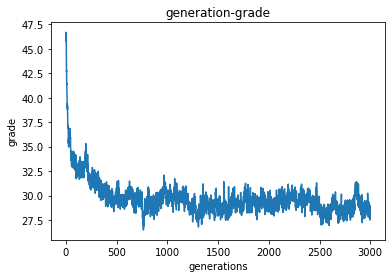

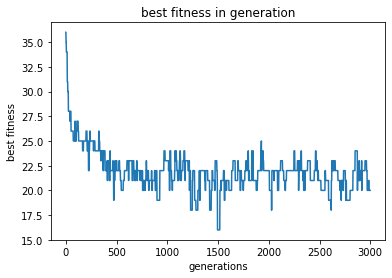

In [24]:
import matplotlib.pyplot as plt
  
# plotting the points 
plt.plot(x_grades, y_grades)
  
# naming the x axis
plt.xlabel('generations')
# naming the y axis
plt.ylabel('grade')
  
# giving a title to my graph
plt.title('generation-grade')
  
# function to show the plot
plt.show()


plt.plot(x_optimal, y_optimal)
plt.xlabel("generations")
plt.ylabel("best fitness")
plt.title("best fitness in generation")
plt.show()